# HW 6: Combinatorial Optimization
---
## OR/ISE 501 - Fall 2021
__Assigned:__ Thu, 21 Oct (Groups of 2)  
__Due:__ 11:59p, Thu, 28 Oct

__Group Members:__ Kamlesh Pandey & Ronak Dhongde

Please use the Code cells in this Jupyter notebook to answer each of the following questions. You can add additional cells for each question if that helps in organizing your solution. Please run all of the cells in your notebook and then submit it via Moodle. (There is a _Run All Cells_ command under the _Run_ menu.)

---
__(1)__ Select the least cost combination of activities where the total cost is the product of the cost of each individual activity selected subject to the square root of the product of the cost of the selected activities exceeding six, where the cost of each activity is 6, 5, 1, 3, 4, 2, and 5, respectively. A BIP formulation of the problem is as follows: 

$ \begin{eqnarray*}
\quad \mbox{Minimize} \quad \prod_{i \in N} c_i x_i \\
\quad \mbox{subject to} \quad \sqrt{\prod_{i \in N} c_i x_i} &\gt& 6 \\ 
x_i &\in& \bigl\{ 0, 1 \bigr\}, &\quad i \in N
\end{eqnarray*} $


In [1]:
using Combinatorics, DataFrames

In [2]:
# Define an Activity dataframe

df = DataFrame(activity = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], Activity_Cost = [6, 5, 1, 3, 4, 2, 5])
df

,activity,Activity_Cost
,Char,Int64
1,A,6
2,B,5
3,C,1
4,D,3
5,E,4
6,F,2
7,G,5


In [3]:
cost_to_activity = [6, 5, 1, 3, 4, 2, 5]
n = length(cost_to_activity)
collect(powerset(1:n,1,n))

127-element Vector{Vector{Int64}}:
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [1, 2]
 [1, 3]
 [1, 4]
 [1, 5]
 [1, 6]
 [1, 7]
 ⋮
 [2, 3, 4, 6, 7]
 [2, 3, 5, 6, 7]
 [2, 4, 5, 6, 7]
 [3, 4, 5, 6, 7]
 [1, 2, 3, 4, 5, 6]
 [1, 2, 3, 4, 5, 7]
 [1, 2, 3, 4, 6, 7]
 [1, 2, 3, 5, 6, 7]
 [1, 2, 4, 5, 6, 7]
 [1, 3, 4, 5, 6, 7]
 [2, 3, 4, 5, 6, 7]
 [1, 2, 3, 4, 5, 6, 7]

In [4]:
TP°, x°, iter = Inf, [], 0    # Minimization problem, so TP° will start from Inf and we have to minimize it

println("[INFO] Generating combinations for minimised total cost.........\n")
for N in powerset(1:n,1,n)
    x = zeros(n)
    x[N] .= 1
    TP = prod(cost_to_activity[i]*x[i] for i in N)
    if TP<TP° &&
        sqrt(prod([cost_to_activity[i]*x[i] for i in N])) > 6 # problem constraint
        TP°, x° = TP, x
    end
    iter += 1
    
    println(iter, ":", TP°, ",", TP, ",", prod(cost_to_activity[N]), ",", x)
    
end

println("\n[INFO] Activity combination for minimised total cost.........\n")
TP°,x°

[INFO] Generating combinations for minimised total cost.........

1:Inf,6.0,6,[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2:Inf,5.0,5,[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3:Inf,1.0,1,[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
4:Inf,3.0,3,[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
5:Inf,4.0,4,[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
6:Inf,2.0,2,[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
7:Inf,5.0,5,[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
8:Inf,30.0,30,[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
9:Inf,6.0,6,[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
10:Inf,18.0,18,[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
11:Inf,24.0,24,[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
12:Inf,12.0,12,[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
13:Inf,30.0,30,[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
14:Inf,5.0,5,[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
15:Inf,15.0,15,[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]
16:Inf,20.0,20,[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
17:Inf,10.0,10,[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]
18:Inf,25.0,25,[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
19:Inf,3.0,3,[0.0, 0.0, 1.0, 1.0, 0.0, 0.0,

(40.0, [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0])

In [5]:
# Looping through the minimized cost for an answer

println("Combinations of activities for least cost with Min cost of: ", TP°)
for (i,activity) in enumerate(x°)
    if activity == 1.0
        println(df.activity[i])
    end
end

Combinations of activities for least cost with Min cost of: 40.0
B
E
F


---
__(2)__ Products A, B, C, D, E, and F are to be produced using eight different machines, Machines 1–8. The routings are as follows:

$ \quad \begin{array}{lll}
A: 3–6–5–8–6–4; & C: 8–4–2–6–5–3–1–7; & E: 5–8–2–6–5–3–1–7; \\
B: 5–3–4–1–7–5; & D: 6–1–4–7–3–5–8–2; & F: 7–6–4–6–4; \end{array}
$

Assuming that 242, 472, 351, 82, 118, and 735 units of A, B, C, D, E, and F, respectively, are to be produced, determine a machine layout that minimizes the total cost for the following site locations:

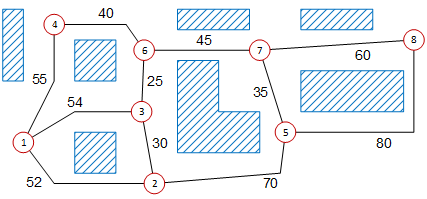

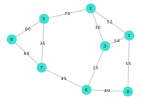

In [6]:
using LightGraphs, SimpleWeightedGraphs
i = [1, 1, 1, 2, 2, 3, 4, 5, 5, 6, 7]   #index of starting node at i
j = [2, 3, 4, 3, 5, 6, 6, 7, 8, 7, 8]    # index of ending node of each arc
w = [52, 54, 55, 30, 70, 25, 40, 35, 80, 45, 60]  #Weight(distance) of each arc

G = SimpleWeightedGraph(i, j, w) # create a undirected network

using GraphPlot, Random
Random.seed!(50)
gplot(G, nodelabel=1:nv(G), edgelabel=[weights(G)[src(e),dst(e)] for e in edges(G)])

In [7]:
D = Matrix(adjacency_matrix(G)) # Distance to Distance matrix

8×8 Matrix{Int64}:
  0  52  54  55   0   0   0   0
 52   0  30   0  70   0   0   0
 54  30   0   0   0  25   0   0
 55   0   0   0   0  40   0   0
  0  70   0   0   0   0  35  80
  0   0  25  40   0   0  45   0
  0   0   0   0  35  45   0  60
  0   0   0   0  80   0  60   0

In [8]:
f = [242, 472, 351, 82, 118, 735]
route = [[3,6,5,8,6,4], 
    [5,3,4,1,7,5], 
    [8,4,2,6,5,3,1,7],
    [6,1,4,7,3,5,8,2], 
    [5,8,2,6,5,3,1,7], 
    [7,6,4,6,4]]
n = maximum([maximum(i) for i in route])
println("Maximum number of Machines: ",n)

Maximum number of Machines: 8


In [9]:
# Weight Matrix of flow volume using route and frequency
W = zeros(n,n)
for i in 1:length(f), (j,k) in zip(route[i][1:end-1],route[i][2:end])
    @show j,k
    W[j,k] += f[i]
end
W   # Machine to machine matrix

(j, k) = (3, 6)
(j, k) = (6, 5)
(j, k) = (5, 8)
(j, k) = (8, 6)
(j, k) = (6, 4)
(j, k) = (5, 3)
(j, k) = (3, 4)
(j, k) = (4, 1)
(j, k) = (1, 7)
(j, k) = (7, 5)
(j, k) = (8, 4)
(j, k) = (4, 2)
(j, k) = (2, 6)
(j, k) = (6, 5)
(j, k) = (5, 3)
(j, k) = (3, 1)
(j, k) = (1, 7)
(j, k) = (6, 1)
(j, k) = (1, 4)
(j, k) = (4, 7)
(j, k) = (7, 3)
(j, k) = (3, 5)
(j, k) = (5, 8)
(j, k) = (8, 2)
(j, k) = (5, 8)
(j, k) = (8, 2)
(j, k) = (2, 6)
(j, k) = (6, 5)
(j, k) = (5, 3)
(j, k) = (3, 1)
(j, k) = (1, 7)
(j, k) = (7, 6)
(j, k) = (6, 4)
(j, k) = (4, 6)
(j, k) = (6, 4)


8×8 Matrix{Float64}:
   0.0    0.0    0.0    82.0    0.0    0.0  941.0    0.0
   0.0    0.0    0.0     0.0    0.0  469.0    0.0    0.0
 469.0    0.0    0.0   472.0   82.0  242.0    0.0    0.0
 472.0  351.0    0.0     0.0    0.0  735.0   82.0    0.0
   0.0    0.0  941.0     0.0    0.0    0.0    0.0  442.0
  82.0    0.0    0.0  1712.0  711.0    0.0    0.0    0.0
   0.0    0.0   82.0     0.0  472.0  735.0    0.0    0.0
   0.0  200.0    0.0   351.0    0.0  242.0    0.0    0.0

In [10]:
# Let alpha be the assignment vector

α = [8,7,6,5,4,3,2,1]
[W[α, α] D]                # W[α, α] is site to site and D is site to site matrix

8×16 Matrix{Float64}:
   0.0    0.0  242.0    0.0   351.0  …  54.0  55.0   0.0   0.0   0.0   0.0
   0.0    0.0  735.0  472.0     0.0     30.0   0.0  70.0   0.0   0.0   0.0
   0.0    0.0    0.0  711.0  1712.0      0.0   0.0   0.0  25.0   0.0   0.0
 442.0    0.0    0.0    0.0     0.0      0.0   0.0   0.0  40.0   0.0   0.0
   0.0   82.0  735.0    0.0     0.0      0.0   0.0   0.0   0.0  35.0  80.0
   0.0    0.0  242.0   82.0   472.0  …  25.0  40.0   0.0   0.0  45.0   0.0
   0.0    0.0  469.0    0.0     0.0      0.0   0.0  35.0  45.0   0.0  60.0
   0.0  941.0    0.0    0.0    82.0      0.0   0.0  80.0   0.0  60.0   0.0

In [11]:
TC = sum(W[α,α].*D)
println("Total distance: ", TC)
#Here total distance is similar to a cost, which we have to minimize

Total distance: 168743.0


### SDPI Method for improving Quadratic Assignment Problem

In [12]:
function sdpi(α°, W, D)
    TC°, n, cnt = sum(W[α°,α°].*D), length(α°), 1
    println(TC°, ":", α°)
    done = false
    while !done
        done = true      # if no improvement found
        α° = copy(α°)
        for i = 1:n-1, j = i+1:n
            cnt += 1
            α = copy(α°)                    # copy simple assignment operation will not work with mutable object
            α[[j,i]] .= α[[i,j]]
            TC = sum(W[α, α].*D)
            
            if TC < TC°
                done = false
                TC°, α° = copy(TC), copy(α)
            end
        end
        println(TC°, ":", α°)
    end
    return (TC=TC°, α = α°, cnt = cnt)
end

α = [8,7,6,5,4,3,2,1]
result = sdpi(α, W,D)

168743.0:[8, 7, 6, 5, 4, 3, 2, 1]
41465.0:[2, 5, 1, 3, 4, 6, 8, 7]
41465.0:[2, 5, 1, 3, 4, 6, 8, 7]


(TC = 41465.0, α = [2, 5, 1, 3, 4, 6, 8, 7], cnt = 57)

In [13]:
α = [1,2,3,4,5,6,7,8]
result = sdpi(α, W,D)

244681.0:[1, 2, 3, 4, 5, 6, 7, 8]
82555.0:[6, 5, 1, 3, 4, 2, 8, 7]
41465.0:[2, 5, 1, 3, 4, 6, 8, 7]
41465.0:[2, 5, 1, 3, 4, 6, 8, 7]


(TC = 41465.0, α = [2, 5, 1, 3, 4, 6, 8, 7], cnt = 85)

In [14]:
α = [8,7,1,2,6,3,5,4]
result = sdpi(α, W,D)

369085.0:[8, 7, 1, 2, 6, 3, 5, 4]
52268.0:[3, 2, 6, 8, 7, 1, 5, 4]
45458.0:[3, 8, 6, 2, 7, 1, 5, 4]
45458.0:[3, 8, 6, 2, 7, 1, 5, 4]


(TC = 45458.0, α = [3, 8, 6, 2, 7, 1, 5, 4], cnt = 85)

### Multistart procedure to find best solution

In [15]:
function multisdpi(W,D)
    TCᵒ, αᵒ, n, cnt = Inf, [], size(W,1), 0
    for i = 1:n
        res = sdpi(randperm(n),W,D)
        cnt += res.cnt
        if res.TC < TCᵒ
            (TCᵒ,αᵒ) = res
        end
        println("\n(",i,") ",res.TC,": ",res.α,"\n")
    end
    return (TC = TCᵒ, α = αᵒ, cnt = cnt)
end
Random.seed!(3242)
multisdpi(W,D)

104215.0:[2, 7, 3, 6, 5, 8, 1, 4]
54422.0:[3, 4, 7, 6, 5, 8, 1, 2]
54422.0:[3, 4, 7, 6, 5, 8, 1, 2]

(1) 54422.0: [3, 4, 7, 6, 5, 8, 1, 2]

213245.0:[2, 8, 3, 1, 6, 7, 4, 5]
49897.0:[6, 1, 8, 3, 2, 7, 4, 5]
49897.0:[6, 1, 8, 3, 2, 7, 4, 5]

(2) 49897.0: [6, 1, 8, 3, 2, 7, 4, 5]

168395.0:[8, 2, 1, 5, 4, 6, 7, 3]
73822.0:[6, 1, 8, 5, 2, 4, 7, 3]
50609.0:[1, 6, 2, 5, 3, 4, 7, 8]
43799.0:[1, 6, 8, 5, 3, 4, 7, 2]
43799.0:[1, 6, 8, 5, 3, 4, 7, 2]

(3) 43799.0: [1, 6, 8, 5, 3, 4, 7, 2]

176892.0:[5, 8, 7, 6, 3, 1, 4, 2]
62990.0:[1, 2, 5, 6, 7, 8, 3, 4]
60688.0:[1, 4, 5, 6, 7, 2, 3, 8]
60688.0:[1, 4, 5, 6, 7, 2, 3, 8]

(4) 60688.0: [1, 4, 5, 6, 7, 2, 3, 8]

280135.0:[6, 4, 2, 8, 1, 3, 7, 5]
54489.0:[3, 7, 2, 8, 4, 6, 1, 5]
54489.0:[3, 7, 2, 8, 4, 6, 1, 5]

(5) 54489.0: [3, 7, 2, 8, 4, 6, 1, 5]

150047.0:[6, 3, 8, 2, 4, 7, 5, 1]
89244.0:[8, 7, 4, 6, 5, 3, 2, 1]
45752.0:[8, 4, 7, 6, 5, 3, 2, 1]
45752.0:[8, 4, 7, 6, 5, 3, 2, 1]

(6) 45752.0: [8, 4, 7, 6, 5, 3, 2, 1]

325800.0:[4, 2, 6, 1, 5, 7, 

(TC = 43799.0, α = [1, 6, 8, 5, 3, 4, 7, 2], cnt = 568)

---
__(3)__ Recommend the best mix of construction and improvement procedures that should be used to schedule independent tasks on parallel identical resources without preemption to minimize makespan for the problem instance created using the following code:

```
n,m = 200,30
using Random
Random.seed!(543235)
t = rand(1:20,n)
```

Describe your recommendation along with its justification in a short paragraph in the space below in this cell, where reference can be made to the results of experiments reported in the code cell below:

__Recommendation:__ 

Recommended allocations of 200 tasks to 30 resources


104: [4, 19, 1, 19, 14, 3, 17, 4, 3, 2, 18]
78: [8, 17, 18, 5, 14, 7, 2, 7]
96: [20, 12, 2, 4, 13, 15, 10, 20]
94: [9, 19, 14, 14, 17, 7, 9, 5]
80: [5, 20, 16, 8, 14, 17]
75: [1, 9, 6, 15, 19, 13, 1, 11]
89: [17, 16, 15, 14, 8, 11, 8]
44: [6, 18, 16, 4]
65: [8, 14, 17, 5, 5, 16]
94: [18, 13, 12, 7, 1, 1, 1, 12, 10, 19]
71: [6, 6, 15, 8, 5, 13, 12, 6]
40: [3, 11, 11, 15]
66: [10, 9, 11, 10, 16, 4, 6]
98: [13, 19, 17, 6, 4, 1, 8, 10, 19, 1]
65: [5, 15, 2, 17, 10, 11, 5]
68: [19, 6, 6, 20, 17]
78: [20, 15, 3, 14, 2, 15, 5, 4]
42: [17, 2, 5, 6, 12]
23: [15, 8]
59: [13, 10, 17, 15, 4]
53: [20, 8, 9, 16]
92: [1, 3, 10, 19, 17, 16, 13, 13]
7: [6, 1]
102: [10, 18, 16, 8, 4, 20, 12, 14]
61: [1, 16, 5, 12, 5, 17, 3, 2]
47: [3, 20, 1, 18, 5]
83: [16, 1, 14, 20, 14, 18]
64: [9, 17, 2, 1, 3, 2, 12, 18]
82: [20, 13, 10, 18, 5, 16]
104: [19, 6, 15, 17, 19, 13, 1, 14]

__Justification:__ From random allocation the total makespan time was 111 min, which I tried to improve using SDPI and Relocate improvemet procedures. For random allocation resource no. 22 was loaded with most time consuming task, which led to the total increase in the makespan time. With further improvement using Relocate improvement procedure, tasks from machine number 22 distributed to other machines which led to decrease in total makespan time to 104. Additionally using SDPI improvement procedure there is no significant improvement in makespan time as two machines have makespan time of 104, any change will only reduce the time at the machine but not makespan time

In [16]:
Random.seed!(543235)
n = 200 # number of tasks
m = 30 # number of machines/resources
t = rand(1:20,n)  # time for each task


200-element Vector{Int64}:
 13
  8
  4
 17
  9
  3
  9
  6
  1
 10
  1
  3
 10
  ⋮
  5
 11
  2
  4
 19
 16
  5
 17
  8
 13
 13
 18

In [17]:
# Generating allocation vector for m machines
a = 0
done = false
while !done
    a = rand(1:m,n)
    if maximum(a) == m
        done = true
    end
end


T = [[] for i = 1:maximum(a)]
for i = 1:length(a)
    push!(T[a[i]],t[i])
end
T

30-element Vector{Vector{Any}}:
 [1, 19, 14, 3, 17, 4, 3, 2, 18]
 [8, 17, 18, 5, 14, 7, 2, 7]
 [20, 12, 2, 4, 13, 15, 10, 20]
 [9, 19, 14, 14, 17, 7, 9, 5]
 [5, 20, 16, 8, 14, 17]
 [1, 9, 6, 15, 19, 13, 1, 11]
 [17, 16, 15, 14, 8, 11, 8]
 [6, 18, 16, 4]
 [8, 14, 17, 5, 5, 16]
 [18, 13, 12, 7, 1, 1, 1, 12, 10, 19]
 [6, 6, 15, 8, 5, 13, 12, 6]
 [3, 11, 11, 15]
 [10, 9, 11, 10, 16, 4, 6]
 ⋮
 [15, 8]
 [13, 10, 17, 15, 4]
 [20, 8, 9, 16]
 [1, 3, 19, 10, 19, 17, 16, 13, 13]
 [6, 1]
 [4, 10, 18, 16, 8, 4, 20, 12, 14]
 [1, 16, 5, 12, 5, 17, 3, 2]
 [3, 20, 1, 18, 5]
 [16, 1, 14, 20, 14, 18]
 [9, 17, 2, 1, 3, 2, 12, 18]
 [20, 13, 10, 18, 5, 16]
 [19, 6, 15, 17, 19, 13, 1, 14]

In [18]:
makespan(a,t) = maximum([sum(t[a.==i]) for i=1:maximum(a)])
makespan(a,t)

111

In [19]:
# function to display task time
function displaytasktimes(a,t)
    T = [Int64[] for i = 1:maximum(a)]
    for i = 1:length(a)
        push!(T[a[i]],t[i])
    end
    for i in T
        println(sum(i),": ",i)
    end
end
displaytasktimes(a,t)

81: [1, 19, 14, 3, 17, 4, 3, 2, 18]
78: [8, 17, 18, 5, 14, 7, 2, 7]
96: [20, 12, 2, 4, 13, 15, 10, 20]
94: [9, 19, 14, 14, 17, 7, 9, 5]
80: [5, 20, 16, 8, 14, 17]
75: [1, 9, 6, 15, 19, 13, 1, 11]
89: [17, 16, 15, 14, 8, 11, 8]
44: [6, 18, 16, 4]
65: [8, 14, 17, 5, 5, 16]
94: [18, 13, 12, 7, 1, 1, 1, 12, 10, 19]
71: [6, 6, 15, 8, 5, 13, 12, 6]
40: [3, 11, 11, 15]
66: [10, 9, 11, 10, 16, 4, 6]
98: [13, 19, 17, 6, 4, 1, 8, 10, 19, 1]
65: [5, 15, 2, 17, 10, 11, 5]
68: [19, 6, 6, 20, 17]
78: [20, 15, 3, 14, 2, 15, 5, 4]
42: [17, 2, 5, 6, 12]
23: [15, 8]
59: [13, 10, 17, 15, 4]
53: [20, 8, 9, 16]
111: [1, 3, 19, 10, 19, 17, 16, 13, 13]
7: [6, 1]
106: [4, 10, 18, 16, 8, 4, 20, 12, 14]
61: [1, 16, 5, 12, 5, 17, 3, 2]
47: [3, 20, 1, 18, 5]
83: [16, 1, 14, 20, 14, 18]
64: [9, 17, 2, 1, 3, 2, 12, 18]
82: [20, 13, 10, 18, 5, 16]
104: [19, 6, 15, 17, 19, 13, 1, 14]


##### Based on the random allocation the maxspan time is 111 min, we will try to minimise the maxspan time

## MAXSPAN  time improvement------->

## 1. Relocate Improment Procedure

In [20]:
function relocate(aᵒ,t)
    cnt = 1
    n = length(aᵒ)
    m = maximum(aᵒ)
    TCᵒ = makespan(aᵒ,t)
    done = false
    while !done
        done = true                 # Assume no improvement will be found
        a₀ = copy(aᵒ)               # Copy as current in case improvement found
        for i = 1:n, j = 1:m
            if a₀[i] != j           # Don't relocate if task already allocated to resource j
                cnt += 1
                a = copy(a₀)        # Work on copy of current assignment
                a[i] = j            # Relocate task i to resource j
                TC = makespan(a,t)  # Calc. TC of relocation
                if TC < TCᵒ         # Improvement found
                    done = false
                    TCᵒ, aᵒ = copy(TC), copy(a)
                end
            end
        end
    end
    return (TC = TCᵒ, a = aᵒ, cnt = cnt)
end

(TC,a) = relocate(a,t)

(TC = 104, a = [14, 9, 1, 7, 4, 26, 28, 11, 22, 24  …  25, 8, 10, 29, 4, 16, 7, 22, 22, 27], cnt = 17401)

In [21]:
displaytasktimes(a,t)

104: [4, 19, 1, 19, 14, 3, 17, 4, 3, 2, 18]
78: [8, 17, 18, 5, 14, 7, 2, 7]
96: [20, 12, 2, 4, 13, 15, 10, 20]
94: [9, 19, 14, 14, 17, 7, 9, 5]
80: [5, 20, 16, 8, 14, 17]
75: [1, 9, 6, 15, 19, 13, 1, 11]
89: [17, 16, 15, 14, 8, 11, 8]
44: [6, 18, 16, 4]
65: [8, 14, 17, 5, 5, 16]
94: [18, 13, 12, 7, 1, 1, 1, 12, 10, 19]
71: [6, 6, 15, 8, 5, 13, 12, 6]
40: [3, 11, 11, 15]
66: [10, 9, 11, 10, 16, 4, 6]
98: [13, 19, 17, 6, 4, 1, 8, 10, 19, 1]
65: [5, 15, 2, 17, 10, 11, 5]
68: [19, 6, 6, 20, 17]
78: [20, 15, 3, 14, 2, 15, 5, 4]
42: [17, 2, 5, 6, 12]
23: [15, 8]
59: [13, 10, 17, 15, 4]
53: [20, 8, 9, 16]
92: [1, 3, 10, 19, 17, 16, 13, 13]
7: [6, 1]
102: [10, 18, 16, 8, 4, 20, 12, 14]
61: [1, 16, 5, 12, 5, 17, 3, 2]
47: [3, 20, 1, 18, 5]
83: [16, 1, 14, 20, 14, 18]
64: [9, 17, 2, 1, 3, 2, 12, 18]
82: [20, 13, 10, 18, 5, 16]
104: [19, 6, 15, 17, 19, 13, 1, 14]


## 2.SDPI improvement procedure

In [22]:
function sdpisched(aᵒ,t)
    cnt = 1
    n = length(aᵒ)
    TCᵒ = makespan(aᵒ,t)
    done = false
    while !done
        done = true                     # Assume no improvement will be found
        a₀ = copy(aᵒ)                   # Copy as current in case improvement found
        for i = 1:n-1, j = i+1:n
            if a₀[i] != a₀[j]
                cnt += 1
                a = copy(a₀)            # Work on copy of current assignment
                a[[j,i]] .= a[[i,j]]    # Pairwise interchange of i and j
                TC = makespan(a,t)      # Calc. TC of interchange
                if TC < TCᵒ             # Improvement found
                    done = false
                    TCᵒ, aᵒ = copy(TC), copy(a)
                end
            end
        end
    end
    return (TC = TCᵒ, a = aᵒ, cnt = cnt)
end

(TC,a) = sdpisched(a,t)

(TC = 104, a = [14, 9, 1, 7, 4, 26, 28, 11, 22, 24  …  25, 8, 10, 29, 4, 16, 7, 22, 22, 27], cnt = 19265)

In [23]:
displaytasktimes(a,t)

104: [4, 19, 1, 19, 14, 3, 17, 4, 3, 2, 18]
78: [8, 17, 18, 5, 14, 7, 2, 7]
96: [20, 12, 2, 4, 13, 15, 10, 20]
94: [9, 19, 14, 14, 17, 7, 9, 5]
80: [5, 20, 16, 8, 14, 17]
75: [1, 9, 6, 15, 19, 13, 1, 11]
89: [17, 16, 15, 14, 8, 11, 8]
44: [6, 18, 16, 4]
65: [8, 14, 17, 5, 5, 16]
94: [18, 13, 12, 7, 1, 1, 1, 12, 10, 19]
71: [6, 6, 15, 8, 5, 13, 12, 6]
40: [3, 11, 11, 15]
66: [10, 9, 11, 10, 16, 4, 6]
98: [13, 19, 17, 6, 4, 1, 8, 10, 19, 1]
65: [5, 15, 2, 17, 10, 11, 5]
68: [19, 6, 6, 20, 17]
78: [20, 15, 3, 14, 2, 15, 5, 4]
42: [17, 2, 5, 6, 12]
23: [15, 8]
59: [13, 10, 17, 15, 4]
53: [20, 8, 9, 16]
92: [1, 3, 10, 19, 17, 16, 13, 13]
7: [6, 1]
102: [10, 18, 16, 8, 4, 20, 12, 14]
61: [1, 16, 5, 12, 5, 17, 3, 2]
47: [3, 20, 1, 18, 5]
83: [16, 1, 14, 20, 14, 18]
64: [9, 17, 2, 1, 3, 2, 12, 18]
82: [20, 13, 10, 18, 5, 16]
104: [19, 6, 15, 17, 19, 13, 1, 14]


---
__(4)__ Implement the MILP formulation of the scheduling independent tasks on parallel identical resources without preemption to minimize makespan problem provided in _Comb Opt 3_ and use it to solve the following extension of Ex 2 of _Comb Opt 3_:

>A repair shop has four identical stations available. Today, 10, 7, 4, 2, 9, 8, 4, and 10 repairs will be performed for each of eight different types of repair, where each type takes, on average, 53, 20, 53, 15, 30, 55, 32, and 21 minutes, respectively. Determine the repairs that should be allocated to each station, assuming that it takes five minutes to switch between each repair at the station no matter the type of repair or the type of the preceding repair. Also, no more than 15 repairs per day should be made at any station.


In [24]:
freq = [10, 7, 4, 2, 9, 8, 4, 10]  #frequency of repair
toper = [53, 20, 53, 15, 30, 55, 32, 21] #time for each repair type
t0 = vcat([repeat([i],j) for (i,j) in zip(toper,freq)]...)  # Time for each repair


#=
t = []   # total time for colmpletion of each task including the 5 min switch time
for (i, f) in enumerate(freq)
    if i==1
        append!(t,(toper[1]*f))
    else
        append!(t,(toper[i]*f + f*5))
    end
end 
t
=#

t= t0.+ 5 # total completion time including the repair 

54-element Vector{Int64}:
 58
 58
 58
 58
 58
 58
 58
 58
 58
 58
 25
 25
 25
  ⋮
 37
 37
 26
 26
 26
 26
 26
 26
 26
 26
 26
 26

In [25]:
m = 4        # number of identical system
M = 1:m  
n = length(t)  # number of tasks
N = 1:n

using Random
Random.seed!(221568)
a = 0
done = false
while !done
    a = rand(1:m,n)
    if maximum(a) == m
        done = true
    end
end
a

54-element Vector{Int64}:
 2
 2
 1
 3
 2
 1
 3
 1
 2
 2
 1
 1
 3
 ⋮
 2
 3
 4
 4
 1
 1
 4
 4
 1
 2
 3
 2

In [26]:
makespan(a,t) = maximum([sum(t[a.==i]) for i=1:maximum(a)])
y = makespan(a,t)   # storing makespan in y varible

659

In [27]:
y  =  makespan(a,t)   # storing makespan in y varible
   
#-----------------------------MODEL FORMULATION------------------

using JuMP, Cbc
model = Model(Cbc.Optimizer)
@variable(model , y>= 0 )
@variable(model, X[1:n, 1:m], Bin)
@objective(model, Min, y)


for j in M
    @constraint(model, y >= sum(t[i]*X[i,j] for i in N))
end

for j in M
    @constraint(model, sum(X[i,j] for i in N)<= 15)
end

for i in N
    @constraint(model, sum(X[i,j] for j in M) == 1)
end


println(model)

set_optimizer_attribute(model, "logLevel", 1)
optimize!(model)
TCᵒ, yᵒ, Xᵒ = objective_value(model), value.(y), value.(X)


Min y
Subject to
 X[1,1] + X[1,2] + X[1,3] + X[1,4] == 1.0
 X[2,1] + X[2,2] + X[2,3] + X[2,4] == 1.0
 X[3,1] + X[3,2] + X[3,3] + X[3,4] == 1.0
 X[4,1] + X[4,2] + X[4,3] + X[4,4] == 1.0
 X[5,1] + X[5,2] + X[5,3] + X[5,4] == 1.0
 X[6,1] + X[6,2] + X[6,3] + X[6,4] == 1.0
 X[7,1] + X[7,2] + X[7,3] + X[7,4] == 1.0
 X[8,1] + X[8,2] + X[8,3] + X[8,4] == 1.0
 X[9,1] + X[9,2] + X[9,3] + X[9,4] == 1.0
 X[10,1] + X[10,2] + X[10,3] + X[10,4] == 1.0
 X[11,1] + X[11,2] + X[11,3] + X[11,4] == 1.0
 X[12,1] + X[12,2] + X[12,3] + X[12,4] == 1.0
 X[13,1] + X[13,2] + X[13,3] + X[13,4] == 1.0
 X[14,1] + X[14,2] + X[14,3] + X[14,4] == 1.0
 X[15,1] + X[15,2] + X[15,3] + X[15,4] == 1.0
 X[16,1] + X[16,2] + X[16,3] + X[16,4] == 1.0
 X[17,1] + X[17,2] + X[17,3] + X[17,4] == 1.0
 X[18,1] + X[18,2] + X[18,3] + X[18,4] == 1.0
 X[19,1] + X[19,2] + X[19,3] + X[19,4] == 1.0
 X[20,1] + X[20,2] + X[20,3] + X[20,4] == 1.0
 X[21,1] + X[21,2] + X[21,3] + X[21,4] == 1.0
 X[22,1] + X[22,2] + X[22,3] + X[22,4] == 1.0
 X[23,1

 X[1,2] binary
 X[2,2] binary
 X[3,2] binary
 X[4,2] binary
 X[5,2] binary
 X[6,2] binary
 X[7,2] binary
 X[8,2] binary
 X[9,2] binary
 X[10,2] binary
 X[11,2] binary
 X[12,2] binary
 X[13,2] binary
 X[14,2] binary
 X[15,2] binary
 X[16,2] binary
 X[17,2] binary
 X[18,2] binary
 X[19,2] binary
 X[20,2] binary
 X[21,2] binary
 X[22,2] binary
 X[23,2] binary
 X[24,2] binary
 X[25,2] binary
 X[26,2] binary
 X[27,2] binary
 X[28,2] binary
 X[29,2] binary
 X[30,2] binary
 X[31,2] binary
 X[32,2] binary
 X[33,2] binary
 X[34,2] binary
 X[35,2] binary
 X[36,2] binary
 X[37,2] binary
 X[38,2] binary
 X[39,2] binary
 X[40,2] binary
 X[41,2] binary
 X[42,2] binary
 X[43,2] binary
 X[44,2] binary
 X[45,2] binary
 X[46,2] binary
 X[47,2] binary
 X[48,2] binary
 X[49,2] binary
 X[50,2] binary
 X[51,2] binary
 X[52,2] binary
 X[53,2] binary
 X[54,2] binary
 X[1,3] binary
 X[2,3] binary
 X[3,3] binary
 X[4,3] binary
 X[5,3] binary
 X[6,3] binary
 X[7,3] binary
 X[8,3] binary
 X[9,3] binary
 X[10,3] b

(558.0, 558.0, [0.0 1.0 0.0 0.0; 0.0 0.0 1.0 0.0; … ; 0.0 1.0 0.0 0.0; 0.0 1.0 0.0 0.0])

In [28]:
println("Allocation of 54 tasks in 4 machines")

Xᵒ.!=0

Allocation of 54 tasks in 4 machines


54×4 BitMatrix:
 0  1  0  0
 0  0  1  0
 0  0  1  0
 1  0  0  0
 0  0  0  1
 1  0  0  0
 0  1  0  0
 0  1  0  0
 1  0  0  0
 0  0  1  0
 1  0  0  0
 0  1  0  0
 1  0  0  0
 ⋮        
 0  0  1  0
 0  1  0  0
 0  0  0  1
 0  1  0  0
 0  0  1  0
 0  0  0  1
 0  0  0  1
 1  0  0  0
 0  0  0  1
 0  0  0  1
 0  1  0  0
 0  1  0  0

---
__(5)__ A hospital has three identical operating rooms available. Five different types of operations will be performed that each takes 50, 30, 150, 90, and 220 minutes, respectively, on average, and there are three, six, two, five, and one operation of each type, respectively, planned for tomorrow. Determine the operations that should be allocated to each room (your recommendation) along with a justification of your approach. Describe your recommendation along with its justification in a short paragraph in the space below in this cell, where reference can be made to computations reported in the code cell below:

__Recommendation:__ 

Recommended allocation of tasks with makespan time. Here the numerical values represent operational time of each 17 events.


440: [50, 50, 30, 90, 220]
440: [50, 30, 30, 150, 90, 90]
420: [30, 30, 30, 150, 90, 90]

__Justification:__ 

Based on the random allocation, the makespan time is 600 which I tried to minimise using SDPI, Relocate and MILP improvement procedures. In case of random allocation resource/machine 3 was loaded with the most time consuming operations. In subsequent improvement procedure I was able to get a makespan time of 440 in two machines/resources. I was also able to formulate problem using MILP and I get same makespan time of 440 min.

### Assumption


In this question I am assuming that we are not bound to operate every task of each operation on a single resource. If I consider that a specefic type of operation will take place on a resource, the time vector will be of size 5. But here I am considering each operation is independent i.e 3+6+2+5+1 = 17 elemnt vector

In [29]:
m = 3 # number of resources
n = 17  # number of task
tpor = [50, 30, 150, 90, 220]   # time for each operation
freq= [ 3, 6, 2, 5, 1]   #number of operations
time = vcat([repeat([i],j) for (i,j) in zip(tpor,freq)]...)  # total time required

17-element Vector{Int64}:
  50
  50
  50
  30
  30
  30
  30
  30
  30
 150
 150
  90
  90
  90
  90
  90
 220

### Random allocation vector generation

In [30]:
using Random
Random.seed!(23421)
a = 0
done = false
while !done
    a = rand(1:m,n)
    if maximum(a) == m
        done = true
    end
end
a              # a is a allocation vector

17-element Vector{Int64}:
 2
 1
 2
 3
 3
 2
 2
 3
 3
 3
 3
 3
 2
 3
 2
 1
 1

In [31]:
# total makespan time with above allocation
makespan(a,t) = maximum([sum(t[a.==i]) for i=1:maximum(a)])
makespan(a,time)

600

In [32]:
function displaytasktimes(a,t)
    T = [Int64[] for i = 1:maximum(a)]
    for i = 1:length(a)
        push!(T[a[i]],t[i])
    end
    for i in T
        println(sum(i),": ",i)
    end
end
displaytasktimes(a,time)

360: [50, 90, 220]
340: [50, 50, 30, 30, 90, 90]
600: [30, 30, 30, 30, 150, 150, 90, 90]


From random allocation approach, each task is allocated to a resource with total makspan time of 600 min. 

# IMPROVING ALLOCATION----> MINIMIZING MAKESPAN TIME

##### 1. Relocate Improvement Procedure

In [33]:
function relocate(aᵒ,t)
    cnt = 1
    n = length(aᵒ)
    m = maximum(aᵒ)
    TCᵒ = makespan(aᵒ,t)
    done = false
    while !done
        done = true                 # Assume no improvement will be found
        a₀ = copy(aᵒ)               # Copy as current in case improvement found
        for i = 1:n, j = 1:m
            if a₀[i] != j           # Don't relocate if task already allocated to resource j
                cnt += 1
                a = copy(a₀)        # Work on copy of current assignment
                a[i] = j            # Relocate task i to resource j
                TC = makespan(a,t)  # Calc. TC of relocation
                if TC < TCᵒ         # Improvement found
                    done = false
                    TCᵒ, aᵒ = copy(TC), copy(a)
                end
            end
        end
    end
    return (TC = TCᵒ, a = aᵒ, cnt = cnt)
end
(TC,a) = relocate(a,time)

(TC = 440, a = [1, 1, 2, 1, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 1, 1], cnt = 137)

In [34]:
displaytasktimes(a,time)

440: [50, 50, 30, 90, 220]
440: [50, 30, 30, 150, 90, 90]
420: [30, 30, 30, 150, 90, 90]


##### 2. SDPI Improvement Procedure

In [35]:
function sdpisched(aᵒ,t)
    cnt = 1
    n = length(aᵒ)
    TCᵒ = makespan(aᵒ,t)
    done = false
    while !done
        done = true                     # Assume no improvement will be found
        a₀ = copy(aᵒ)                   # Copy as current in case improvement found
        for i = 1:n-1, j = i+1:n
            if a₀[i] != a₀[j]
                cnt += 1
                a = copy(a₀)            # Work on copy of current assignment
                a[[j,i]] .= a[[i,j]]    # Pairwise interchange of i and j
                TC = makespan(a,t)      # Calc. TC of interchange
                if TC < TCᵒ             # Improvement found
                    done = false
                    TCᵒ, aᵒ = copy(TC), copy(a)
                end
            end
        end
    end
    return (TC = TCᵒ, a = aᵒ, cnt = cnt)
end
sdpisched(a, time)

(TC = 440, a = [1, 1, 2, 1, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 1, 1], cnt = 97)

In [36]:
displaytasktimes(a,time)

440: [50, 50, 30, 90, 220]
440: [50, 30, 30, 150, 90, 90]
420: [30, 30, 30, 150, 90, 90]


##### 3. MILP Improvement Procedure

In [37]:
a = [1, 1, 2, 1, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 1, 1]   # allocation vector based on the SDPI improvement procedure

makespan(a,t) = maximum([sum(t[a.==i]) for i=1:maximum(a)])
y = makespan(a,time)   # storing makespan time in y variable


N = 1:n
M = 1:m

#-----------------------------MODEL FORMULATION------------------
using JuMP, Cbc
model = Model(Cbc.Optimizer)
@variable(model , y>= 0 )
@variable(model, X[1:n, 1:m], Bin)
@objective(model, Min, y)
for j in M
    @constraint(model, y>= sum(time[i]*X[i,j] for i in N))
end
for i in N
    @constraint(model, sum(X[i,j] for j in M) == 1)
end

println(model)

set_optimizer_attribute(model, "logLevel", 1)
optimize!(model)
TCᵒ, yᵒ, Xᵒ = objective_value(model), value.(y), value.(X)



Min y
Subject to
 X[1,1] + X[1,2] + X[1,3] == 1.0
 X[2,1] + X[2,2] + X[2,3] == 1.0
 X[3,1] + X[3,2] + X[3,3] == 1.0
 X[4,1] + X[4,2] + X[4,3] == 1.0
 X[5,1] + X[5,2] + X[5,3] == 1.0
 X[6,1] + X[6,2] + X[6,3] == 1.0
 X[7,1] + X[7,2] + X[7,3] == 1.0
 X[8,1] + X[8,2] + X[8,3] == 1.0
 X[9,1] + X[9,2] + X[9,3] == 1.0
 X[10,1] + X[10,2] + X[10,3] == 1.0
 X[11,1] + X[11,2] + X[11,3] == 1.0
 X[12,1] + X[12,2] + X[12,3] == 1.0
 X[13,1] + X[13,2] + X[13,3] == 1.0
 X[14,1] + X[14,2] + X[14,3] == 1.0
 X[15,1] + X[15,2] + X[15,3] == 1.0
 X[16,1] + X[16,2] + X[16,3] == 1.0
 X[17,1] + X[17,2] + X[17,3] == 1.0
 y - 50 X[1,1] - 50 X[2,1] - 50 X[3,1] - 30 X[4,1] - 30 X[5,1] - 30 X[6,1] - 30 X[7,1] - 30 X[8,1] - 30 X[9,1] - 150 X[10,1] - 150 X[11,1] - 90 X[12,1] - 90 X[13,1] - 90 X[14,1] - 90 X[15,1] - 90 X[16,1] - 220 X[17,1] >= 0.0
 y - 50 X[1,2] - 50 X[2,2] - 50 X[3,2] - 30 X[4,2] - 30 X[5,2] - 30 X[6,2] - 30 X[7,2] - 30 X[8,2] - 30 X[9,2] - 150 X[10,2] - 150 X[11,2] - 90 X[12,2] - 90 X[13,2] - 90 X[1

(440.0, 440.00000000000006, [1.0 0.0 0.0; 0.0 0.0 1.0; … ; 1.0 0.0 0.0; 0.0 0.0 1.0])

In [38]:
Xᵒ.!=0

17×3 BitMatrix:
 1  0  0
 0  0  1
 0  1  0
 1  0  0
 0  1  0
 0  1  0
 1  0  0
 1  0  0
 1  0  0
 0  1  0
 0  0  1
 0  1  0
 0  1  0
 1  0  0
 1  0  0
 1  0  0
 0  0  1